In [95]:
import pandas as pd
import plotly.graph_objects as go

In [97]:
df=pd.read_csv('medals.csv')
df.head(1)

medal_type  medal_code  medal_date             name gender    discipline  \
0  Gold Medal         1.0  2024-07-27  Remco EVENEPOEL      M  Cycling Road   

                         event event_type  \
0  Men's Individual Time Trial        ATH   

                                           url_event     code country_code  \
0  /en/paris-2024/results/cycling-road/men-s-indi...  1903136          BEL   

   country country_long  
0  Belgium      Belgium

In [99]:
country_counts=df['country_long'].value_counts()
country_counts.head(1)

country_long
United States of America    126
Name: count, dtype: int64

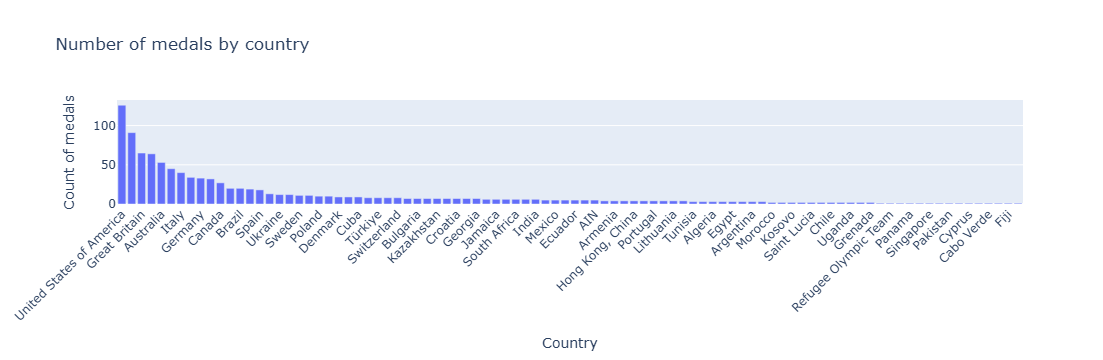

In [101]:
bar_fig=go.Figure(data=[
    go.Bar(x=country_counts.index,
           y=country_counts.values)
    ]
                 )

bar_fig.update_layout(
    title="Number of medals by country",
    xaxis_title="Country",
    yaxis_title="Count of medals",
    xaxis_tickangle=-45
)

bar_fig.show()

In [103]:
medal_count=df.groupby(['country_long','medal_type']).size().unstack(fill_value=0)
medal_count.head(1)

medal_type    Bronze Medal  Gold Medal  Silver Medal
country_long                                        
AIN                      1           1             3

In [105]:
medal_order=['Gold Medal', 'Silver Medal', 'Bronze Medal']
medal_count=medal_count[medal_order]
medal_count.head(1)

medal_type    Gold Medal  Silver Medal  Bronze Medal
country_long                                        
AIN                    1             3             1

In [107]:
medal_count['Total']=medal_count.sum(axis=1)
medal_count_sorted=medal_count.sort_values(by='Total', ascending=False)
medal_count_sorted_top10=medal_count_sorted.head(10)
medal_count_sorted_top10.head(1)

medal_type                Gold Medal  Silver Medal  Bronze Medal  Total
country_long                                                           
United States of America          40            44            42    126

In [109]:
country_names=medal_count_sorted_top10.index
total_medals=medal_count_sorted_top10['Total']

In [111]:
medals_info=[
    ('Bronze Medal', '#cd7f32', 'Bronze Medals'),
    ('Silver Medal', 'silver', 'Silver Medals'),
    ('Gold Medal', 'gold', 'Gold Medals')
]

traces=[]

for medal_name, color, hover_label in medals_info:
    if medal_name=='Gold Medal':
        hovertemplate=f"<b>Total Medal:</b>" + total_medals.astype(str) + f"<br><b>{hover_label}:</b> %{{y}}"
        opacity=0.4
        line=dict(
        color='black',
        width=1.5
        )
    else:
        hovertemplate= f"<br><b>{hover_label}:</b> %{{y}}<extra></extra>"
        opacity=1
        line=dict()

    traces.append(go.Bar(
        x=medal_count_sorted_top10.index,
        y=medal_count_sorted_top10[medal_name],
        name=medal_name.split()[0],
        hovertemplate=hovertemplate,
        marker=dict(
            color=color,
            opacity=opacity,
            line=line
            )
    )
)

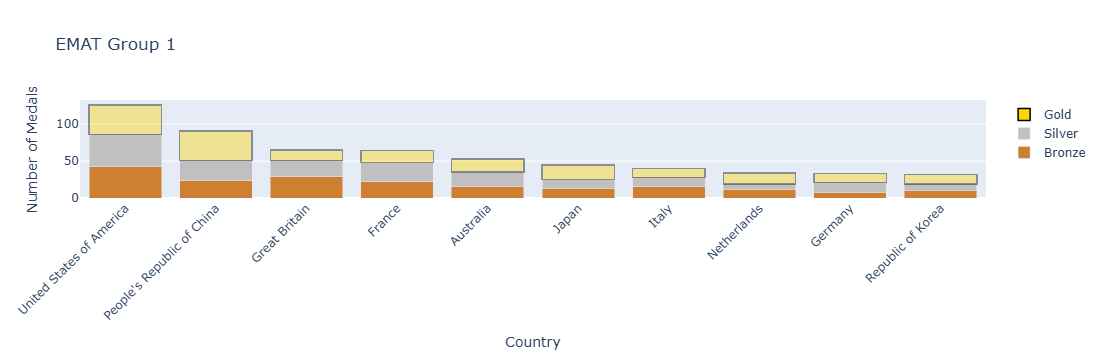

In [113]:
stacked_bar_fig=go.Figure(data=traces)

stacked_bar_fig.update_layout(
    barmode='stack',
    title="EMAT Group 1",
    xaxis_title="Country",
    yaxis_title="Number of Medals",
    xaxis_tickangle=-45,
    hovermode="x unified",
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

In [115]:
stacked_bar_fig.write_html("Stacked Chart.html")

In [ ]:
stacked_bar_fig.write_image("Stacked Chart.pdf", format="pdf") 

## Week 7- Group 2

In [37]:
import pandas as pd
import plotly.graph_objects as go

In [39]:
df=pd.read_csv('USA_cars_datasets.csv')
df.head()

Unnamed: 0  price      brand    model  year   title_status   mileage  \
0           0   6300     toyota  cruiser  2008  clean vehicle  274117.0   
1           1   2899       ford       se  2011  clean vehicle  190552.0   
2           2   5350      dodge      mpv  2018  clean vehicle   39590.0   
3           3  25000       ford     door  2014  clean vehicle   64146.0   
4           4  27700  chevrolet     1500  2018  clean vehicle    6654.0   

    color                  vin        lot       state country      condition  
0   black    jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1  silver    2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2  silver    3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3    blue    1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4     red    3gcpcrec2jg473991  167763266     florida     usa  22 hours left

In [41]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

price      brand    model  year   title_status   mileage   color  \
0   6300     toyota  cruiser  2008  clean vehicle  274117.0   black   
1   2899       ford       se  2011  clean vehicle  190552.0  silver   
2   5350      dodge      mpv  2018  clean vehicle   39590.0  silver   
3  25000       ford     door  2014  clean vehicle   64146.0    blue   
4  27700  chevrolet     1500  2018  clean vehicle    6654.0     red   

                   vin        lot       state country      condition  
0    jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1    2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2    3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3    1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4    3gcpcrec2jg473991  167763266     florida     usa  22 hours left

In [43]:
df.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [45]:
df_brand=df['brand'].value_counts().sort_values(ascending=False).reset_index() 
df_state=df['state'].value_counts().sort_values(ascending=False).reset_index()

In [47]:
df_brand

brand  count
0              ford   1235
1             dodge    432
2            nissan    312
3         chevrolet    297
4               gmc     42
5              jeep     30
6          chrysler     18
7               bmw     17
8           hyundai     15
9               kia     13
10            buick     13
11         infiniti     12
12            honda     12
13    mercedes-benz     10
14         cadillac     10
15        heartland      5
16             land      4
17        peterbilt      4
18             audi      4
19            acura      3
20          lincoln      2
21            lexus      2
22            mazda      2
23         maserati      1
24           toyota      1
25  harley-davidson      1
26           jaguar      1
27              ram      1

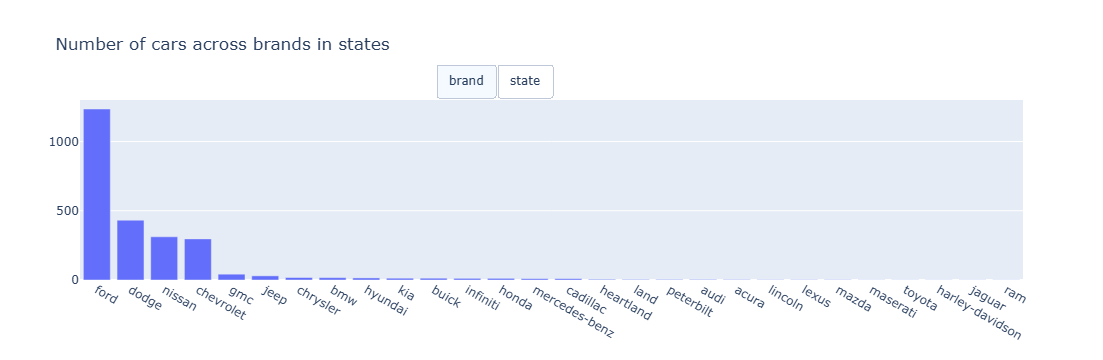

In [49]:
fig=go.Figure()

fig.add_trace(
    go.Bar(x=df_brand['brand'], y=df_brand['count'], name='Brand count', 
          marker_color='Sky blue')
)

fig.add_trace(
    go.Bar(x=df_state['state'], y=df_brand['count'], name='State count', 
          marker_color='Yellow')
)

fig.data[1].visible=False

fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            direction='right',
            active=0,
            x=0.5,
            y=1.2,
            buttons=list(
                [
                    dict(
                        label='brand',
                        method='update',
                        args=[{'visible': [True, False]},
                             {'title': 'Number of cars for brands'}]),
                    dict(
                        label='state',
                        method='update',
                        args=[{'visible': [False, True]},
                             {'title': 'Number of cars in different states'}])
                ]
            )
        )
    ]
)

fig.update_layout(title_text='Number of cars across brands in states')
fig.show()

In [51]:
fig2=go.Figure()

brands=sorted(df['brand'].unique())
brands

['acura',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chrysler',
 'dodge',
 'ford',
 'gmc',
 'harley-davidson',
 'heartland',
 'honda',
 'hyundai',
 'infiniti',
 'jaguar',
 'jeep',
 'kia',
 'land',
 'lexus',
 'lincoln',
 'maserati',
 'mazda',
 'mercedes-benz',
 'nissan',
 'peterbilt',
 'ram',
 'toyota']

In [53]:
for brand in brands: 
    dff= df[df['brand']== brand]
    fig2.add_trace(go.Scatter(
        x=dff['mileage'],
        y=dff['price'],
        mode='markers',
        name=brand
        #marker=dict()
    ))

buttons=[]
for brand in ['All '] + brands: 
    visible=[brand==trace.name or 'All'==brand for trace in fig2.data]
    button=dict(label=brand,
                method='update',
               args=[{'visible': visible},
                    {'title':f'price vs Mileage: {brand}'}])
    buttons.append(button)


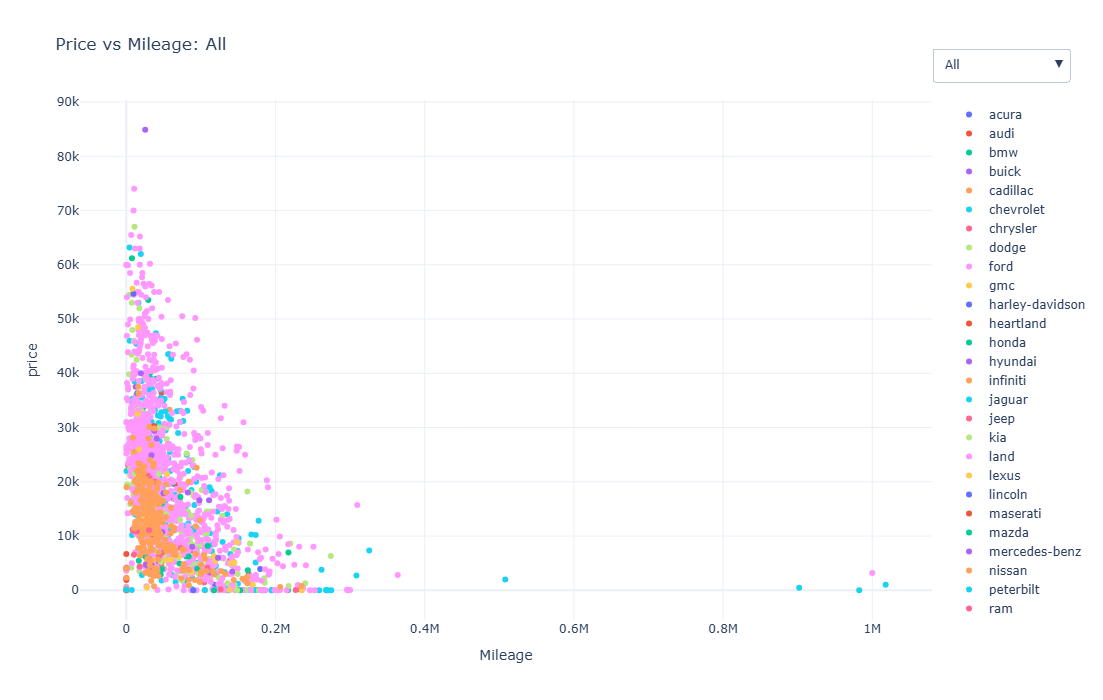

In [55]:
fig2.update_layout(
    updatemenus=[
        dict(active=0,
            buttons=buttons,
            x=1,
            xanchor='left',
            y=1.1,
            yanchor='top')
    ],
    title='Price vs Mileage: All',
    xaxis_title='Mileage',
    yaxis_title='price',
    height=700,
    template='plotly_white'
)

fig2.show()

## Week 7-Group 3

In [46]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [50]:
df=pd.read_csv('AB_NYC_2019-1.csv')
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [52]:
mv=df.isnull().sum()
mv

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

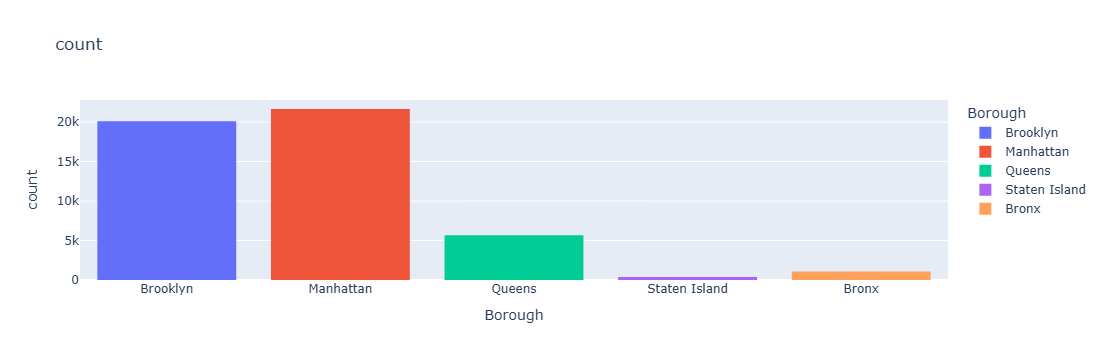

In [58]:
fig1=px.histogram(df, x='neighbourhood_group', 
                  title='count',
                  labels={'neighbourhood_group': 'Borough', 'count': 'Number of Listings'},
                  color='neighbourhood_group')

fig1.show()

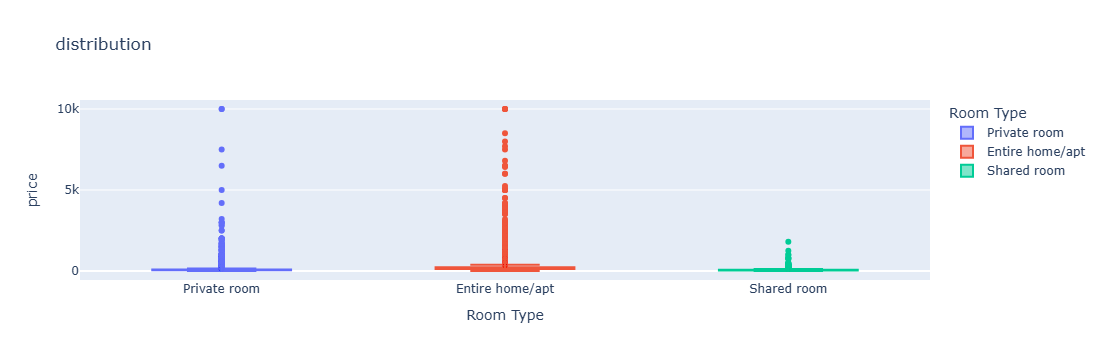

In [60]:
fig2=px.box(df, x='room_type', y='price', title='distribution', labels={'room_type': 'Room Type', 'Price': 'Price(per night)'}, color='room_type')
fig2.show()

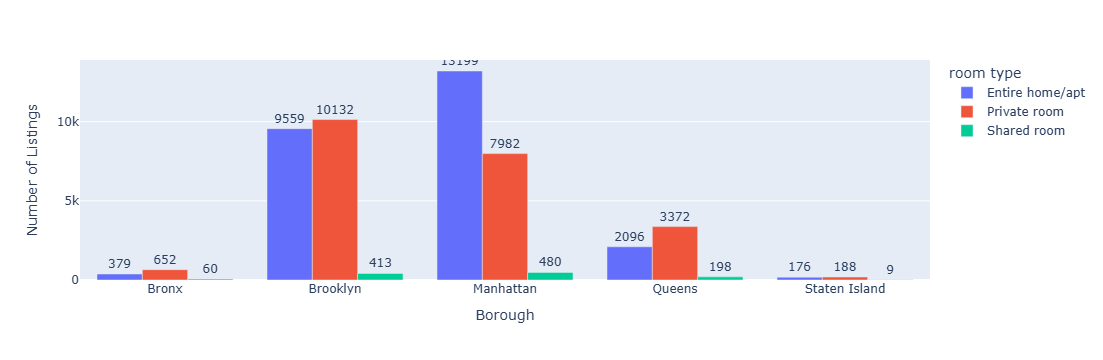

In [64]:
room_count = df.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')
fig=px.bar(room_count, x='neighbourhood_group', y='count', color='room_type', 
           labels={'neighbourhood_group':'Borough','count': 'Number of Listings', 'room_type': 'room type'},
           barmode='group',
           text='count')
fig.update_traces(textposition='outside', textfont_size=12)
fig.update_layout(height=500)
fig.show()

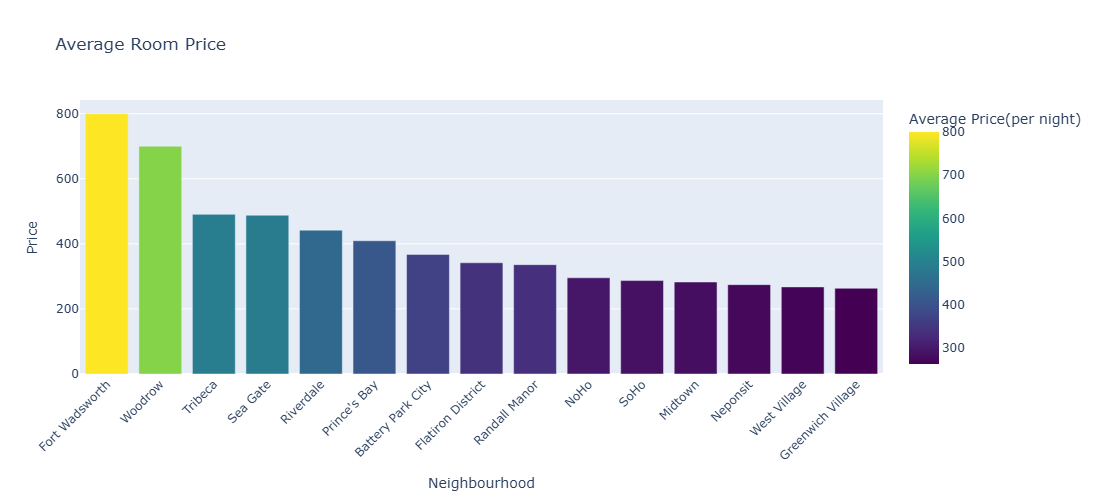

In [72]:
average_price_neighbourhood = df.groupby('neighbourhood')['price'].mean().reset_index()
top_15_neighbourhoods=average_price_neighbourhood.sort_values(by='price', ascending=False).head(15)
fig=px.bar(top_15_neighbourhoods, x='neighbourhood', y='price', 
           title='Average Room Price',
           labels={'neighbourhood': 'neighbourhood', 'price': 'Average Price(per night)'},
           color='price',
          color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(xaxis_title='Neighbourhood', 
                  yaxis_title='Price', 
                  xaxis_tickangle=-45, 
                  width=700,
                  height=500)
fig.show()                  